## Import the cleaned tables for the analysis

In [ ]:
import pandas as pd
all_orders_df = pd.read_csv('C:/Users/Irene/Downloads/all_orders_qu.csv')

In [ ]:
all_orders_df2=all_orders_df.copy()

In [ ]:
#all_orders_df2.info()

In [ ]:
## 1.&nbsp; Category creation ROBERTO


In [ ]:
import pandas as pd
products_cat_rob = pd.read_csv('C:/Users/Irene/Downloads/product_category_df.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

## How do discounts vary with the pricing and quantity of different product categories?

In [ ]:
products_cat_rob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85867 entries, 0 to 85866
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           85867 non-null  int64  
 1   id                   85867 non-null  int64  
 2   order_id             85867 non-null  int64  
 3   sku                  85867 non-null  object 
 4   name                 85867 non-null  object 
 5   desc                 85867 non-null  object 
 6   type                 85867 non-null  object 
 7   created_date         85867 non-null  object 
 8   date                 85867 non-null  object 
 9   state                85867 non-null  object 
 10  unit_price           85867 non-null  float64
 11  product_quantity     85867 non-null  int64  
 12  unit_price_total     85867 non-null  float64
 13  price                85867 non-null  float64
 14  total_paid           85867 non-null  float64
 15  discount_percentage  85867 non-null 

In [ ]:
grouped_data2 = products_cat_rob.groupby("category").agg(
    average_price=("price", "mean"),
    average_discount=("discount_percentage", "mean"),
    sku=("sku", "count")
)
grouped_data2.head(30)

,average_price,average_discount,sku
category,,,
"accessories for iphones, ipad and watches",81.53,26.33,16104
"guarranty, services and repairs",130.62,23.00,3189
"ipad, ipod, appleWatch",572.40,4.58,2776
iphones,346.57,19.72,11599
keyboards and monitor,221.44,21.35,9338
mac,2355.67,9.84,6642
mac accessories,120.74,21.19,16286
mac related hardware,251.77,16.87,16877
other,171.18,17.90,3056


In [ ]:
grouped_data3 = products_cat_rob.groupby("category").agg(
    average_price=("price", "mean"),
    average_discount=("discount_percentage", "mean"),
    product_quantity=("product_quantity", "count")

)
grouped_data3.head(30)

,average_price,average_discount,product_quantity
category,,,
"accessories for iphones, ipad and watches",81.53,26.33,16104
"guarranty, services and repairs",130.62,23.00,3189
"ipad, ipod, appleWatch",572.40,4.58,2776
iphones,346.57,19.72,11599
keyboards and monitor,221.44,21.35,9338
mac,2355.67,9.84,6642
mac accessories,120.74,21.19,16286
mac related hardware,251.77,16.87,16877
other,171.18,17.90,3056


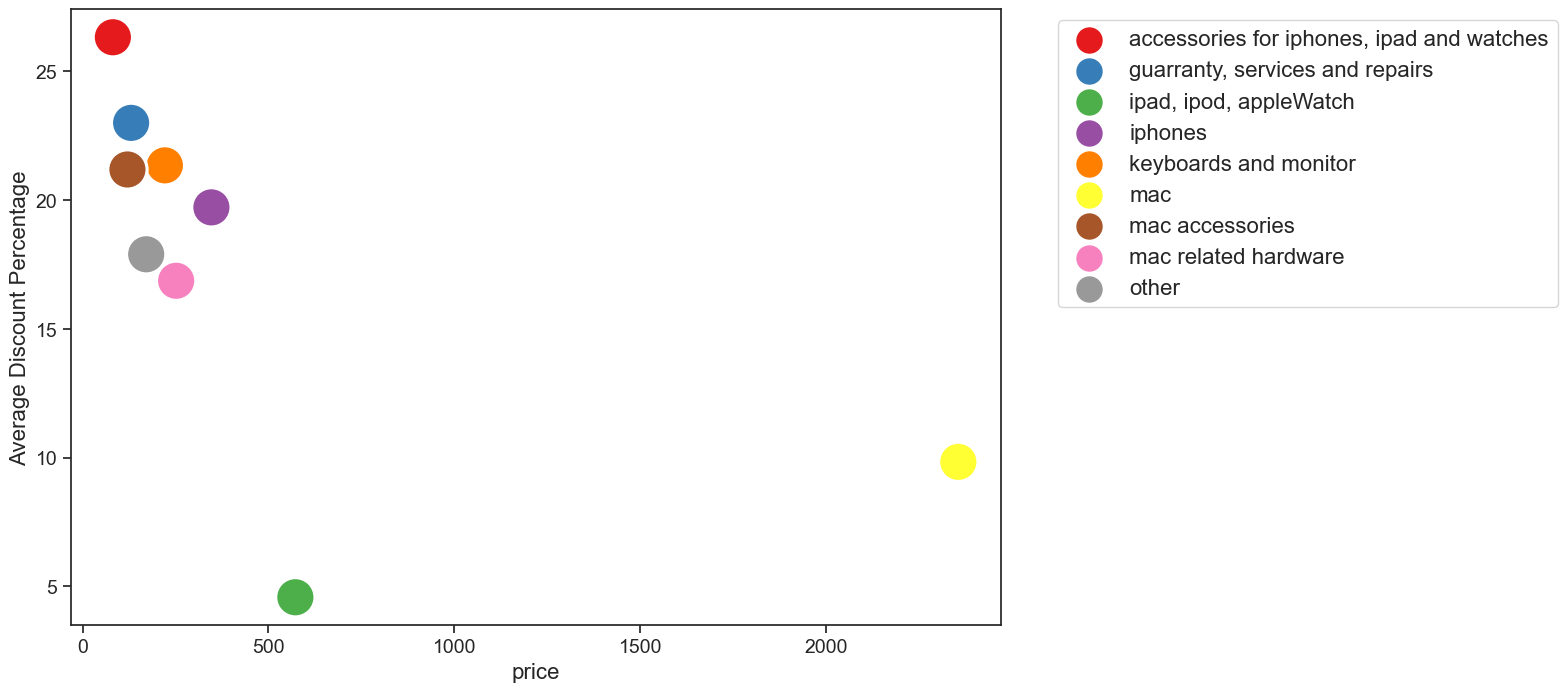

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sku' is on the x-axis and 'average_discount_percentage' on the y-axis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='average_price', y='average_discount', data=grouped_data3, hue='category', palette='Set1', s=800)

# Set plot labels and title
plt.xlabel('price', fontsize=16)
plt.ylabel('Average Discount Percentage', fontsize=16)

# Set the font size for the axis labels
plt.xticks(fontsize=14)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed
# Remove grid
plt.grid(False)

# Place the legend outside the graphic and make it bigger
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 16}, markerscale=3)

# Show the plot
plt.show()

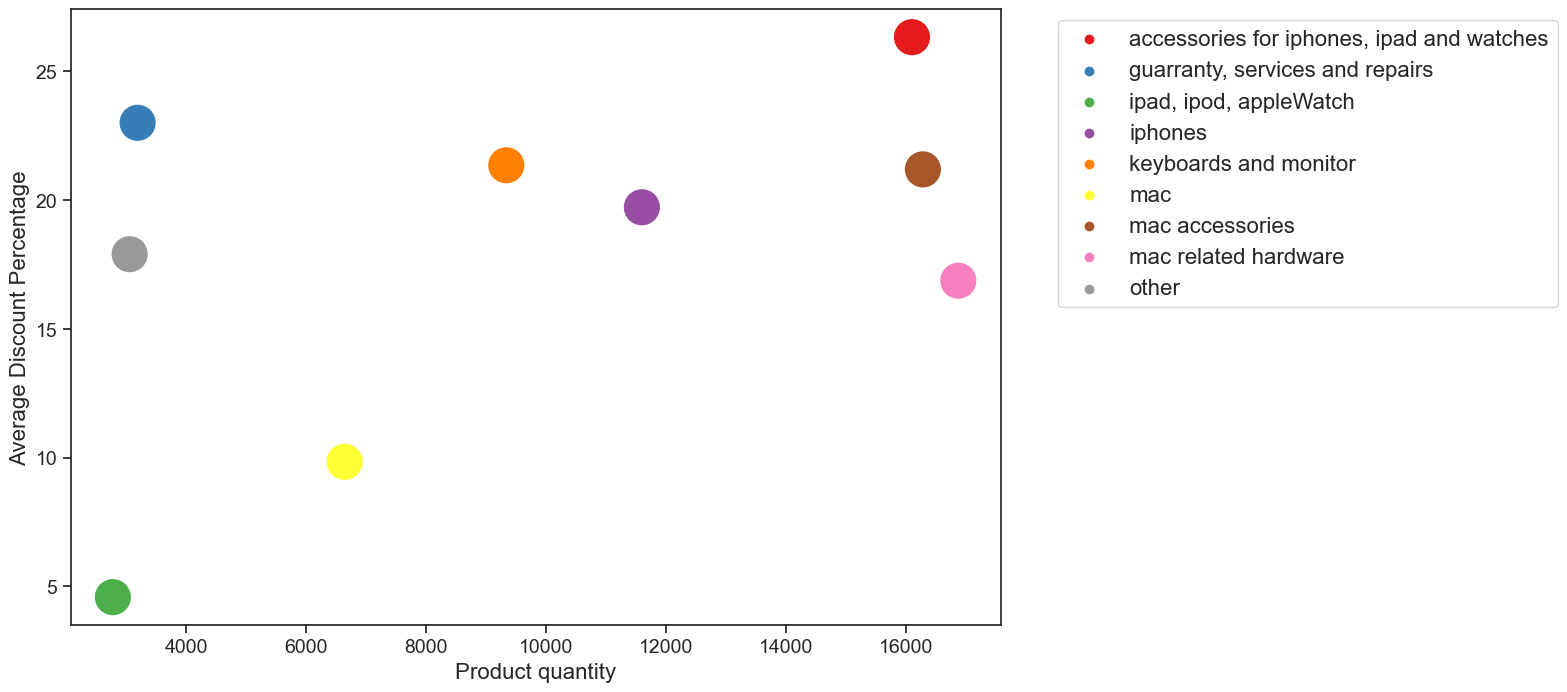

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sku' is on the x-axis and 'average_discount_percentage' on the y-axis
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='product_quantity', y='average_discount', data=grouped_data3, hue='category', palette='Set1', s=800)

# Set plot labels and title
plt.xlabel('Product quantity', fontsize=16)  # Adjust the font size as needed
plt.ylabel('Average Discount Percentage', fontsize=16)  # Adjust the font size as needed

# Set the font size for the axis labels
plt.xticks(fontsize=14)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed

# Remove grid
plt.grid(False)

# Place the legend outside the graphic and make it bigger
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 16})

# Show the plot
plt.show()



## 1.&nbsp; Converting to datetime of all_orders_df

In [ ]:
all_last_df=products_cat_rob.copy()

In [ ]:
import pandas as pd
# Assuming the first column has index 0
all_last_df.drop(all_last_df.columns[0], axis=1, inplace=True)


In [ ]:
all_last_df['created_date'] = pd.to_datetime(all_last_df['created_date'])

In [ ]:
all_last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85867 entries, 0 to 85866
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   85867 non-null  int64         
 1   order_id             85867 non-null  int64         
 2   sku                  85867 non-null  object        
 3   name                 85867 non-null  object        
 4   desc                 85867 non-null  object        
 5   type                 85867 non-null  object        
 6   created_date         85867 non-null  datetime64[ns]
 7   date                 85867 non-null  object        
 8   state                85867 non-null  object        
 9   unit_price           85867 non-null  float64       
 10  product_quantity     85867 non-null  int64         
 11  unit_price_total     85867 non-null  float64       
 12  price                85867 non-null  float64       
 13  total_paid           85867 non-

In [ ]:
all_last_df.loc[:,"month"] = all_last_df["created_date"].dt.month
all_last_df.head()

,id,order_id,sku,name,desc,type,created_date,date,state,unit_price,product_quantity,unit_price_total,price,total_paid,discount_percentage,category,month
0,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-01-02 10:00:20,2017-01-01 02:07:42,Completed,2565.99,1,2565.99,3209.00,2565.99,20.04,mac,1
1,1173758,321056,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-02-07 19:17:55,2017-02-07 18:57:17,Completed,2721.99,1,2721.99,3209.00,2721.99,15.18,mac,2
2,1174256,321299,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-02-08 12:40:15,2017-02-08 12:33:10,Completed,2721.99,1,2721.99,3209.00,2721.99,15.18,mac,2
3,1119131,299553,APP1854,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2158,2017-01-01 02:14:47,2017-01-01 02:14:47,Place Order,3278.99,1,3278.99,3279.00,3278.99,0.00,mac,1
4,1155530,313389,APP1854,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2158,2017-01-22 22:13:53,2017-01-22 22:13:53,Place Order,3114.99,1,3114.99,3279.00,3114.99,5.00,mac,1


In [ ]:
all_last_df.loc[:,"month_name"] = all_last_df["created_date"].dt.month_name()
all_last_df.head()

,id,order_id,sku,name,desc,type,created_date,date,state,unit_price,product_quantity,unit_price_total,price,total_paid,discount_percentage,category,month,month_name
0,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-01-02 10:00:20,2017-01-01 02:07:42,Completed,2565.99,1,2565.99,3209.00,2565.99,20.04,mac,1,January
1,1173758,321056,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-02-07 19:17:55,2017-02-07 18:57:17,Completed,2721.99,1,2721.99,3209.00,2721.99,15.18,mac,2,February
2,1174256,321299,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-02-08 12:40:15,2017-02-08 12:33:10,Completed,2721.99,1,2721.99,3209.00,2721.99,15.18,mac,2,February
3,1119131,299553,APP1854,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2158,2017-01-01 02:14:47,2017-01-01 02:14:47,Place Order,3278.99,1,3278.99,3279.00,3278.99,0.00,mac,1,January
4,1155530,313389,APP1854,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2158,2017-01-22 22:13:53,2017-01-22 22:13:53,Place Order,3114.99,1,3114.99,3279.00,3114.99,5.00,mac,1,January


In [ ]:
all_last_df.loc[:,"day"] = all_last_df["created_date"].dt.day
all_last_df.head()

,id,order_id,sku,name,desc,type,created_date,date,state,unit_price,product_quantity,unit_price_total,price,total_paid,discount_percentage,category,month,month_name,year,day
0,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-01-02 10:00:20,2017-01-01 02:07:42,Completed,2565.99,1,2565.99,3209.00,2565.99,20.04,mac,1,January,2017,2
1,1173758,321056,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-02-07 19:17:55,2017-02-07 18:57:17,Completed,2721.99,1,2721.99,3209.00,2721.99,15.18,mac,2,February,2017,7
2,1174256,321299,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,1282,2017-02-08 12:40:15,2017-02-08 12:33:10,Completed,2721.99,1,2721.99,3209.00,2721.99,15.18,mac,2,February,2017,8
3,1119131,299553,APP1854,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2158,2017-01-01 02:14:47,2017-01-01 02:14:47,Place Order,3278.99,1,3278.99,3279.00,3278.99,0.00,mac,1,January,2017,1
4,1155530,313389,APP1854,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2158,2017-01-22 22:13:53,2017-01-22 22:13:53,Place Order,3114.99,1,3114.99,3279.00,3114.99,5.00,mac,1,January,2017,22


In [ ]:
all_last_df.loc[:,"weekday"] = all_last_df["created_date"].dt.weekday
all_last_df.loc[:,"day_of_week"] = all_last_df["created_date"].dt.day_name()
all_last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85867 entries, 0 to 85866
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   85867 non-null  int64         
 1   order_id             85867 non-null  int64         
 2   sku                  85867 non-null  object        
 3   name                 85867 non-null  object        
 4   desc                 85867 non-null  object        
 5   type                 85867 non-null  object        
 6   created_date         85867 non-null  datetime64[ns]
 7   date                 85867 non-null  object        
 8   state                85867 non-null  object        
 9   unit_price           85867 non-null  float64       
 10  product_quantity     85867 non-null  int64         
 11  unit_price_total     85867 non-null  float64       
 12  price                85867 non-null  float64       
 13  total_paid           85867 non-

In [ ]:
all_last_df['year_month'] = pd.to_datetime(all_last_df['year'].astype(str) + '-' + all_last_df['month'].astype(str), format='%Y-%m')

## How does monthly revenue and the average discount rate impact on sales performance from 2017 to 2018 ?

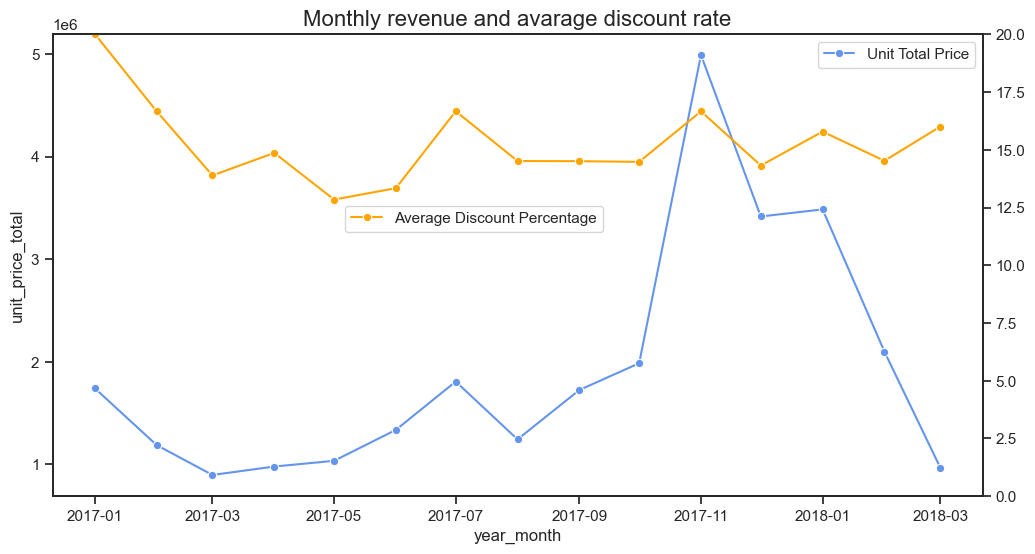

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_last_df' is your DataFrame
plt.figure(figsize=(12, 6))
sns.set_style("ticks")

# Group by year and month and sum the 'unit_price_total'
grouped_df89 = all_last_df.groupby(['year_month'])['unit_price_total'].sum().reset_index()
# Plotting unit total price
sns.lineplot(x='year_month', y='unit_price_total', data=grouped_df89, marker='o', color="cornflowerblue", label='Unit Total Price')

# Group by year and month and sum the 'unit_price_total'
grouped_df6 = all_last_df.groupby(['year_month'])['discount_percentage'].median().reset_index()
# Creating a secondary y-axis for the 'difference' variable
ax2 = plt.gca().twinx()
sns.lineplot(x='year_month', y='discount_percentage', data=grouped_df6, color='orange', marker='o', ax=ax2, label='Average Discount Percentage')

# Remove primary and secondary y-axis labels
plt.gca().set_ylabel('')
ax2.set_ylabel('')

# Set plot labels and title
plt.title('Monthly revenue and avarage discount rate', fontsize=16)
plt.xlabel('Year and Month', fontsize=14)

# Set y-axis limits to start from 0
plt.ylim(0, grouped_df89['unit_price_total'].max())  # Adjust the upper limit as needed
ax2.set_ylim(0, grouped_df6['discount_percentage'].max())  # Adjust the upper limit as needed

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Place the first legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Unit Total Price')

# Place the second legend outside the graph
ax2.legend(loc='center right', bbox_to_anchor=(0.6, 0.6))
# Place the legend outside the graph


# Show the plot
plt.show()


In [ ]:
#Script for slide #How do discounts influence sales during seasonal shifts and special events? (Hanne)

In [ ]:
#Script for slide Discounts have an effect on the revenue per day, but depending on category (Hanne)